In [1]:
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rcParams["figure.dpi"] = 140

In [2]:
methods = ('cvae', 'scvi', 'symphony', 'seurat')
conds = ('control', 'stimulated')

In [4]:
repl = dict(cvae='scArches + expiMap', qtr='scArches + expiMap', scvi='scArches + scVI', seurat='Seurat', symphony='Symphony')

In [5]:
folder = 'kang_no_le_metrics/'
filenames = os.listdir(folder)

In [6]:
metrics = {}
for file in filenames:
    for cond in conds:
        for method in methods:
            if method in file and cond in file:
                df = pd.DataFrame(pd.read_pickle(folder+file), index=[repl[method]])
                del df['adata_name']
                if cond in metrics:
                    metrics[cond] = metrics[cond].append(df)
                else:
                    metrics[cond] = df

In [7]:
metrics['control'].rename_axis('methods', inplace=True)

In [8]:
metrics['control']

,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,graph_cLISI,NMI,ARI,ASW_cell_type
methods,,,,,,,,,
scArches + expiMap,0.917290,0.984697,0.325171,0.932479,1.763039e-01,0.364903,0.722660,0.677607,0.505193
scArches + scVI,0.804964,0.824839,0.085352,0.980285,1.103780e-02,0.865369,0.695296,0.636402,0.518656
Seurat,0.301125,0.641337,0.006364,0.952870,0.000000e+00,0.919002,0.716216,0.654591,0.513468
Symphony,0.526308,0.630974,0.015735,0.932421,2.220446e-16,0.912897,0.694415,0.619372,0.549256


In [12]:
metrics['control']['overall'] = metrics['control'].mean(axis=1)

In [13]:
metrics['control']

,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,graph_cLISI,NMI,ARI,ASW_cell_type,overall
methods,,,,,,,,,,
scArches + expiMap,0.917290,0.984697,0.325171,0.932479,1.763039e-01,0.364903,0.722660,0.677607,0.505193,0.622923
scArches + scVI,0.804964,0.824839,0.085352,0.980285,1.103780e-02,0.865369,0.695296,0.636402,0.518656,0.602467
Seurat,0.301125,0.641337,0.006364,0.952870,0.000000e+00,0.919002,0.716216,0.654591,0.513468,0.522775
Symphony,0.526308,0.630974,0.015735,0.932421,2.220446e-16,0.912897,0.694415,0.619372,0.549256,0.542375


In [14]:
sb.color_palette('Set2', 4)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)]

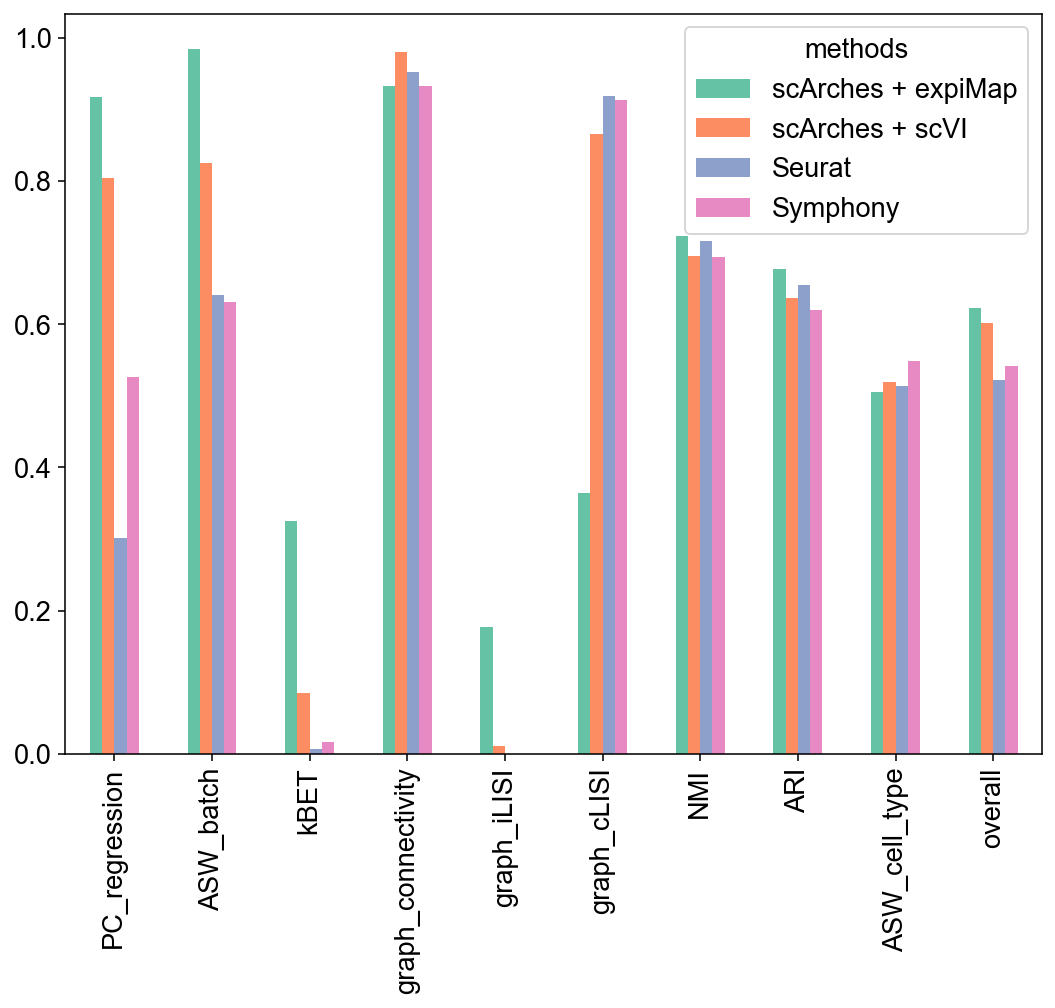

In [15]:
#axs = metrics['control'].drop(columns=['bio', 'batch']).T.plot.bar(figsize=(9,7), colormap='viridis')
axs = metrics['control'].T.plot.bar(figsize=(9,7), color=sb.color_palette('Set2', 4))

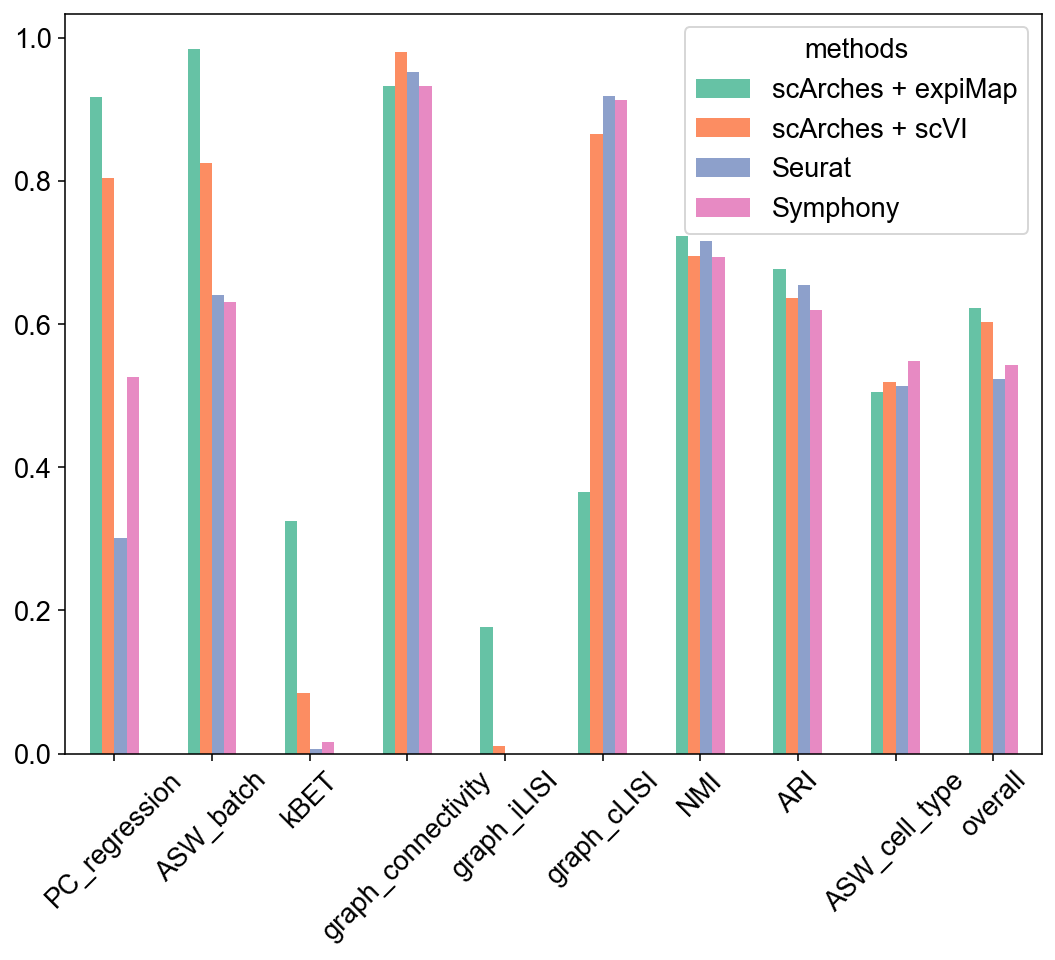

In [16]:
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.figure